In [87]:
output_path='/Users/Gaia_1/Desktop/Data after SS thresh 3'
list_dir=glob.glob(output_path+"/*.txt")
for file in list_dir:
    print(file)

/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-23T11-41-41Pop1 healthy cortical .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-29-05MIP 5 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-49-35Pop3 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-55-53MIP3 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T12-08-45MIP4 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-38-41MiP2 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T10-03-29MIP4 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T09-22-44MIP 5 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T16-00-33Pop1 24hour after healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP scores/*.txt")
#list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
dataset = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
#dataset.to_csv("merged_data.csv", index=False)
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,score,Target,Stimulation
0,0.033752,0.026832,6.146017e-02,0.030909,0.383788,0.344440,1.000000,1.460269e-07,3.546668e-08,0.064030,0.0,0.0
1,0.033134,0.026059,6.314898e-02,0.036732,0.386172,0.350197,1.000000,1.033784e-08,5.968611e-09,0.068225,0.0,0.0
2,0.033298,0.026767,6.708787e-02,0.046021,0.386777,0.349459,1.000000,1.959580e-07,9.157318e-08,0.061535,0.0,0.0
3,0.033493,0.026519,6.282182e-02,0.030459,0.383312,0.341055,1.000000,9.648819e-08,3.575563e-08,0.061335,0.0,0.0
4,0.032974,0.025866,6.308468e-02,0.033693,0.385092,0.347405,1.000000,4.407161e-08,1.683473e-08,0.062659,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.050616,0.026634,2.284669e-02,0.096958,0.315152,0.163408,0.543656,4.563435e-01,5.968653e-08,0.193786,0.0,0.0
664,0.057557,0.028160,5.235134e-02,0.069468,0.321707,0.192334,0.575948,4.240515e-01,1.911695e-07,0.113257,0.0,0.0
665,0.053260,0.031083,5.737179e-07,0.108185,0.248023,0.060402,0.445422,5.545780e-01,9.840582e-16,0.284483,0.0,0.0
666,0.048749,0.026283,3.671914e-07,0.111340,0.312674,0.154662,0.451368,5.486318e-01,3.613233e-09,0.282560,0.0,0.0


In [100]:
dataset=dataset.drop(['Stimulation'],axis=1)
dataset=dataset.drop(['score'],axis=1)

In [77]:
dataset['Target'].value_counts()

0.0    406
1.0    167
Name: Target, dtype: int64

In [78]:
X = dataset.drop(['Target'],axis=1)
y= dataset['Target']
from random import randint
rand=randint(0,300)
print(rand)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

147


In [79]:
cv = StratifiedKFold(4)

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7,svd_solver='full')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.fit(X_train).explained_variance_ratio_)

[0.83419309 0.10296545 0.04314977 0.00998933 0.0062359  0.00232549
 0.00103514]


In [81]:
params = {'max_depth':np.linspace(2,10,dtype='int'),'criterion':['gini','entropy']}

clf = DecisionTreeClassifier(random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

gs_pca = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)
gs_pca = gs_pca.fit(X_train_pca,y_train)
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

y_true, y_pred = y_test, gs_pca.predict(X_test_pca)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Best parameters set found : {'criterion': 'entropy', 'max_depth': 3} 

Classification report on Test set

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       122
         1.0       0.96      0.92      0.94        50

    accuracy                           0.97       172
   macro avg       0.96      0.95      0.96       172
weighted avg       0.97      0.97      0.96       172

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       122
         1.0       0.98      0.92      0.95        50

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.96       172
weighted avg       0.97      0.97      0.97       172



In [82]:
params = {'C': np.logspace(-3, 3, 50), 'penalty': ['l1', 'l2']}

clf = LogisticRegression(solver='liblinear',random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [83]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

roc_auc = round(roc_auc_score(y_true, y_pred),3)
print('ROC AUC: ',roc_auc)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Best parameters set found : {'C': 25.595479226995334, 'penalty': 'l1'} 

Classification report on Test set

ROC AUC:  0.966
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       122
         1.0       0.98      0.94      0.96        50

    accuracy                           0.98       172
   macro avg       0.98      0.97      0.97       172
weighted avg       0.98      0.98      0.98       172



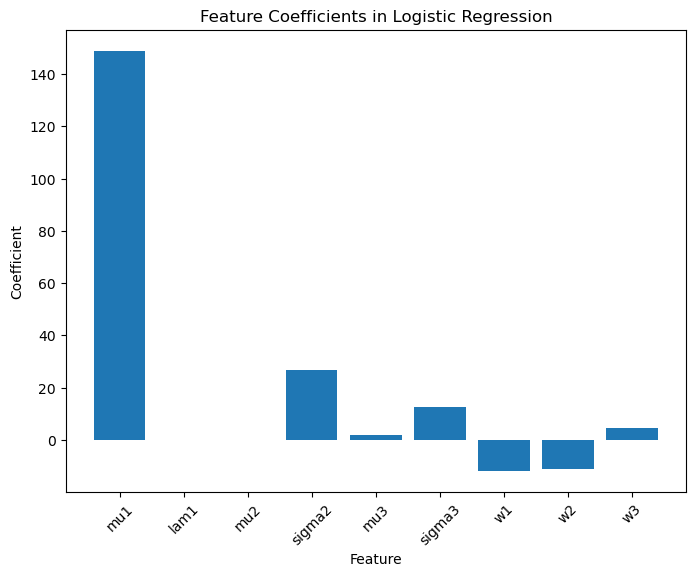

In [53]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming log_reg is your trained Logistic Regression model
coefficients = gs.best_estimator_.coef_[0]  # Use gs.best_estimator_ to get the best model from grid search
feature_names = X.columns  # Assuming X is your DataFrame without the target column

plt.figure(figsize=(8, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression')
plt.xticks(rotation=45)
plt.show()

In [85]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset_after=merged_df

dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)
dataset_after

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
805,0.030000,0.024695,0.059022,0.036943,0.100000,0.106931,0.435041,0.311040,2.539190e-01,0.0,0.0
806,0.030000,0.026658,0.053893,0.049967,0.100000,0.123759,0.376015,0.450747,1.732381e-01,0.0,0.0
807,0.029975,0.025515,0.056269,0.033665,0.102328,0.103310,0.341048,0.360353,2.985997e-01,0.0,0.0
808,0.030000,0.022255,0.052986,0.031594,0.100000,0.098919,0.366657,0.305299,3.280442e-01,0.0,0.0


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#dataset = pd.read_csv("dataset_after.csv")
dataset=dataset_after
# Combine "target" and "stimulation" columns to create a new categorical variable
#dataset['class'] = dataset['Target'].astype(int) + dataset['Stimulation'].astype(int)
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


# Split the dataset into features (X) and target variable (y)
X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

# Split the data into training and testing sets
#rand=randint(0,300)
rand=252
print(rand)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)


252


In [93]:
dataset_after['class'].value_counts()

2    282
1    232
0    173
3    123
Name: class, dtype: int64

In [94]:
print("Classification report on Test set\n")
gs = DecisionTreeClassifier(max_depth=7,random_state=rand)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)
print(roc_auc)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification report on Test set

0.864914401433534
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        34
           1       0.84      0.78      0.81        49
           2       0.79      0.82      0.81        61
           3       0.42      0.44      0.43        18

    accuracy                           0.74       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.74      0.74      0.74       162



In [95]:
from sklearn.preprocessing import label_binarize
# Predict probabilities
y_prob = gs.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Compute ROC AUC
roc_auc = roc_auc_score(y_test_binarized, y_prob, average='macro')

print('ROC AUC:', roc_auc)

ROC AUC: 0.864914401433534


Text(67.24999999999999, 0.5, 'True')

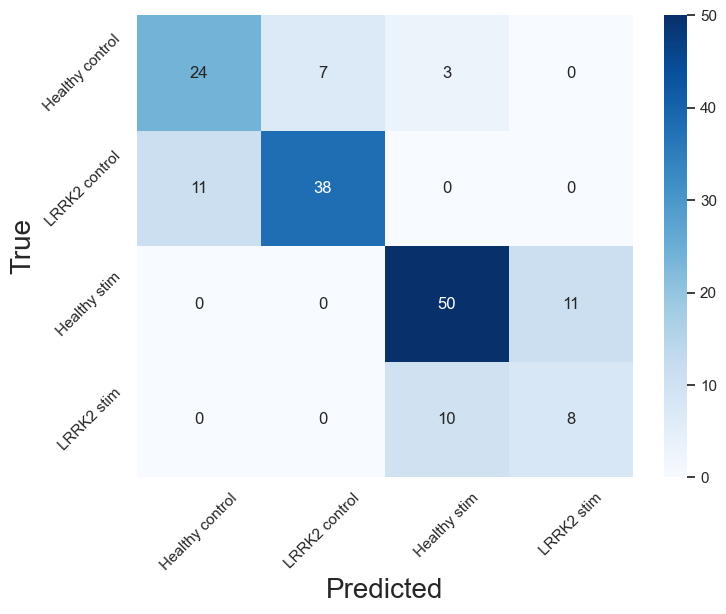

In [96]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

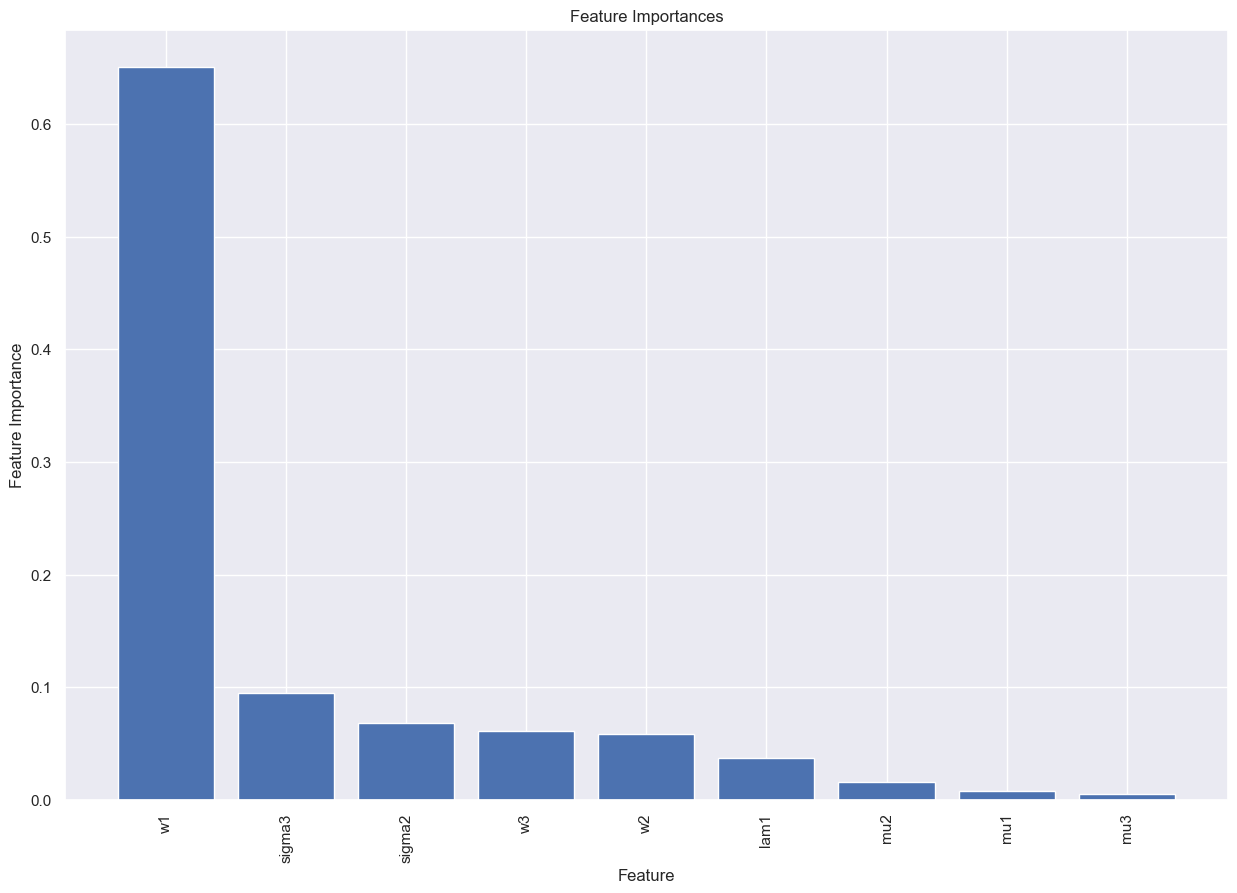

In [97]:
plt.figure(figsize=(15, 10))
importances = gs.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)  # Set feature names as x-labels
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.savefig('4class_feat_import_decision_tree.jpg')
plt.show()

In [122]:
#only baseline
HEALTHY=dataset[dataset['Target'] != 1]
LRRK2=dataset[dataset['Target'] != 0]
HEALTHY_BL = dataset[(dataset['Target'] != 1) & (dataset['Stimulation']!=1)]
LRRK2_BL = dataset[(dataset['Target'] != 0)&(dataset['Stimulation']!=1)]
HEALTHY_ST = dataset[(dataset['Target']!=1)&(dataset['Stimulation'] != 0)]
LRRK2_ST = dataset[(dataset['Target']!=0)&(dataset['Stimulation'] != 0)]
#dataset

In [114]:
data=LRRK2
#data=HEALTHY

mean_w1='{:.4f}'.format(np.mean(data['w1']))
std_w1='{:.4f}'.format(np.std(data['w1']))
print('w1: ',mean_w1,'±',std_w1)

mean_w2='{:.4f}'.format(np.mean(data['w2']))
std_w2='{:.4f}'.format(np.std(data['w2']))
print('w2: ',mean_w2,'±',std_w2)

mean_w3='{:.4f}'.format(np.mean(data['w3']))
std_w3='{:.4f}'.format(np.std(data['w3']))
print('w3: ',mean_w3,'±',std_w3)


mean_mu1='{:.4f}'.format(np.mean(data['mu1']))
std_mu1='{:.4f}'.format(np.std(data['mu1']))
print('mu1: ',mean_mu1,'±',std_mu1)

mean_lambda='{:.4f}'.format(np.mean(data['lam1']))
std_lambda='{:.4f}'.format(np.std(data['lam1']))
print('lambda: ',mean_lambda,'±',std_lambda)

mean_mu2='{:.4f}'.format(np.mean(data['mu2']))
std_mu2='{:.4f}'.format(np.std(data['mu2']))
print('mu2: ',mean_mu2,'±',std_mu2)

mean_sigma2='{:.4f}'.format(np.mean(data['sigma2']))
std_sigma2='{:.4f}'.format(np.std(data['sigma2']))
print('sigma2: ',mean_sigma2,'±',std_sigma2)

mean_mu3='{:.4f}'.format(np.mean(data['mu3']))
std_mu3='{:.4f}'.format(np.std(data['mu3']))
print('mu3: ',mean_mu3,'±',std_mu3)

mean_sigma3='{:.4f}'.format(np.mean(data['sigma3']))
std_sigma3='{:.4f}'.format(np.std(data['sigma3']))
print('sigma3: ',mean_sigma3,'±',std_sigma3)

#mean_score=np.mean(data['score'])
#std_score=np.std(data['score'])
#print('score: ',mean_score,'+/-',std_score)


w1:  0.2708 ± 0.0922
w2:  0.4926 ± 0.1122
w3:  0.2366 ± 0.1000
mu1:  0.1029 ± 0.0269
lambda:  0.0382 ± 0.0092
mu2:  0.0435 ± 0.0382
sigma2:  0.1317 ± 0.0527
mu3:  0.2306 ± 0.0910
sigma3:  0.2763 ± 0.0923


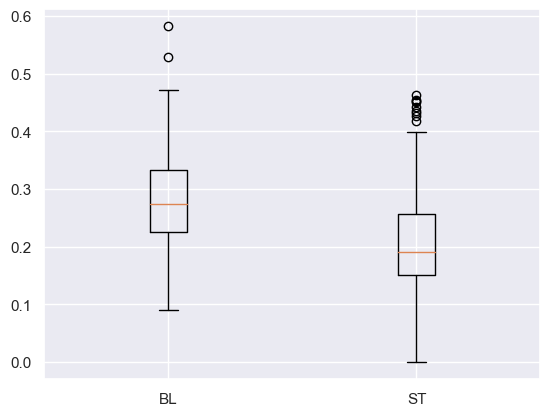

In [124]:
score_data1 = LRRK2_BL['w1']
score_data2 = LRRK2_ST['w1']

# Plotting the boxplot
labels = ['BL', 'ST']

# Plotting the boxplot
plt.boxplot([score_data1, score_data2], labels=labels)
plt.savefig('w1LRRK2.jpg')
plt.show()

In [20]:
#dataset=dataset.drop(['Stimulation'],axis=1)

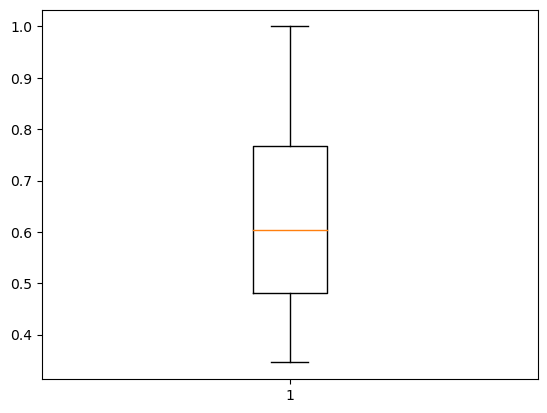

In [6]:
#score_data = dataset['score']
score_data = dataset['w1']

# Plotting the boxplot
plt.boxplot(score_data)
#plt.title('Boxplot of Scores')
#plt.ylabel('Score')
plt.show()

# HEALTHY

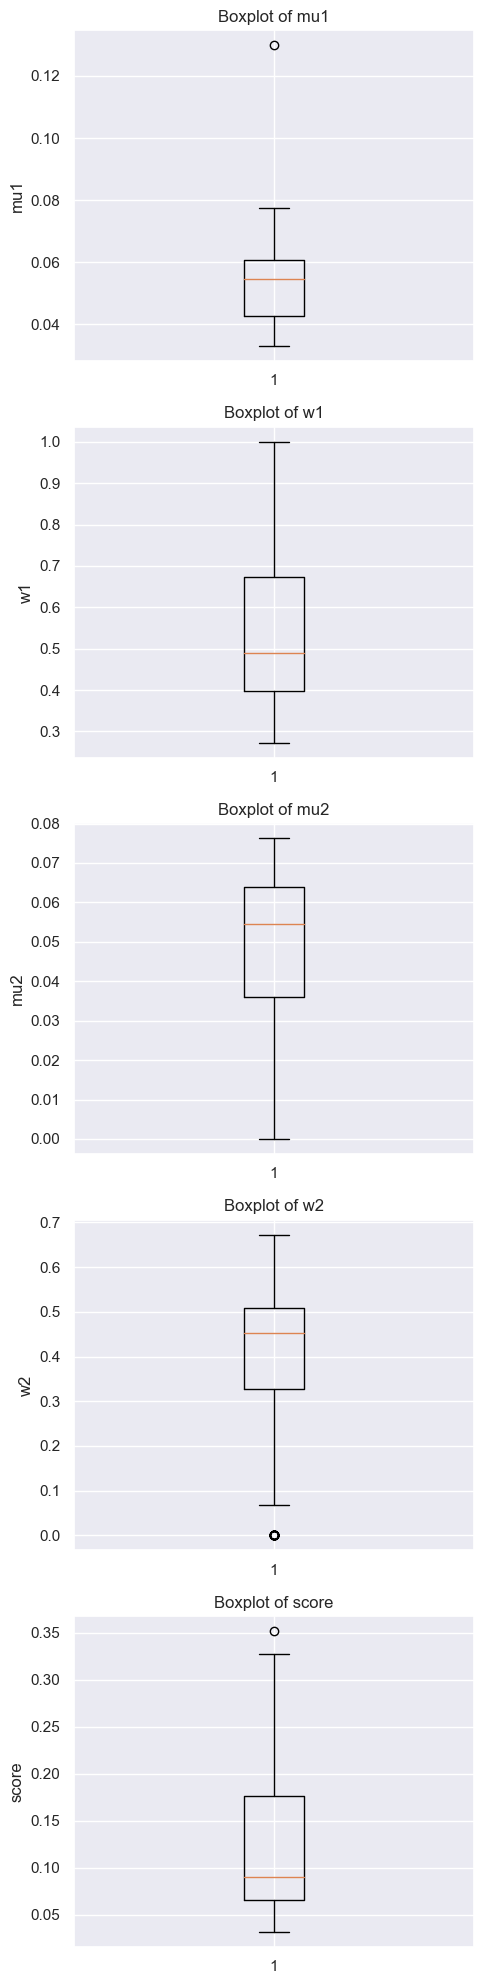

In [104]:
data=HEALTHY
columns_to_plot = ["mu1", "w1", "mu2", "w2", "score"]
#columns_to_plot=data.columns
nr=int(len(columns_to_plot))
#fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 35))
fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 20))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(data[column])
    axes[i].set_title('Boxplot of {}'.format(column))
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

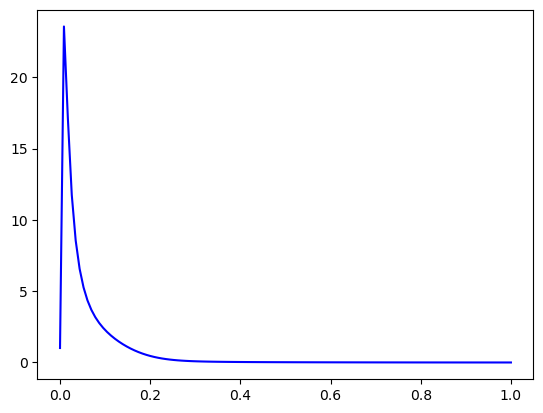

In [65]:
data=HEALTHY
mu1=np.mean(data['mu1'])
w1=np.mean(data['w1'])
lam1=np.mean(data['lam1'])
w2=np.mean(data['w2'])
mu2=np.mean(data['mu2'])
sigma2=np.mean(data['sigma2'])
w3=np.mean(data['w3'])
mu3=np.mean(data['mu3'])
sigma3=np.mean(data['sigma3'])
d= np.linspace(0.00, 1, len(data))
import scipy.stats as st
pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)
#bins = np.arange(0, .5, 1e-3) 

#plt.hist(ISI_data, bins, color='orange', alpha=0.7, label='Histogram',density=True)
plt.plot(d,pdf, color='blue', label='PDF')


# LRRK2

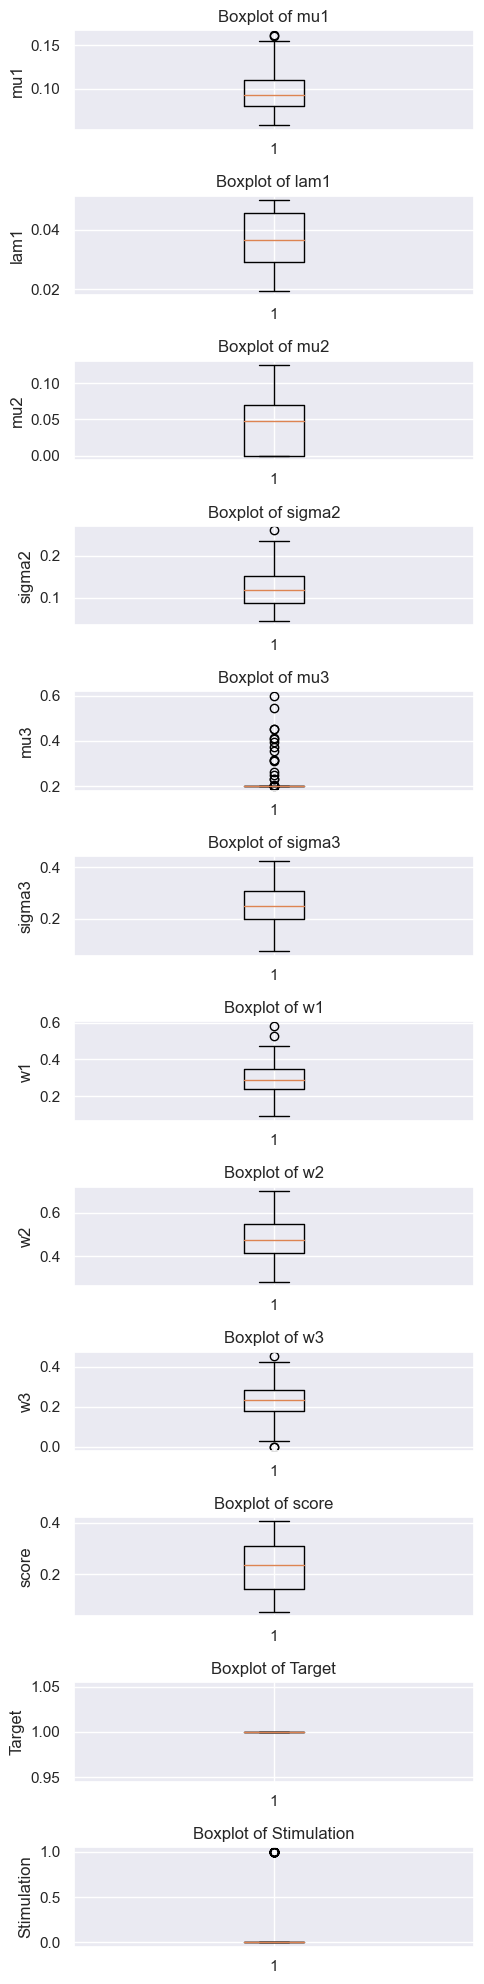

In [105]:
data=LRRK2
columns_to_plot = ["mu1", "w1", "mu2", "w2", "score"]
columns_to_plot=data.columns
nr=int(len(columns_to_plot))
#fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 35))
fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 20))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(data[column])
    axes[i].set_title('Boxplot of {}'.format(column))
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

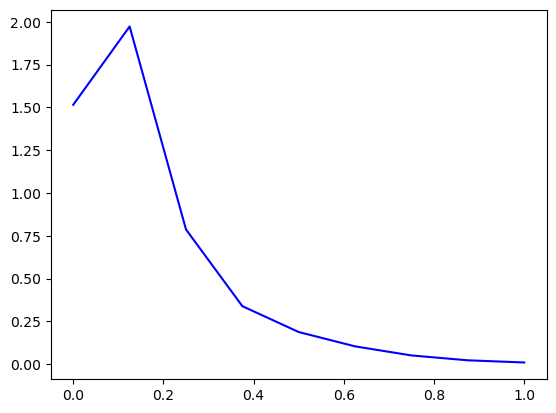

In [68]:
data=LRRK2
mu1=np.mean(data['mu1'])
w1=np.mean(data['w1'])
lam1=np.mean(data['lam1'])
w2=np.mean(data['w2'])
mu2=np.mean(data['mu2'])
sigma2=np.mean(data['sigma2'])
w3=np.mean(data['w3'])
mu3=np.mean(data['mu3'])
sigma3=np.mean(data['sigma3'])
d= np.linspace(0.00, 1, len(data))
import scipy.stats as st
pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)
#bins = np.arange(0, .5, 1e-3) 

#plt.hist(ISI_data, bins, color='orange', alpha=0.7, label='Histogram',density=True)
plt.plot(d,pdf, color='blue', label='PDF')


# BASELINE

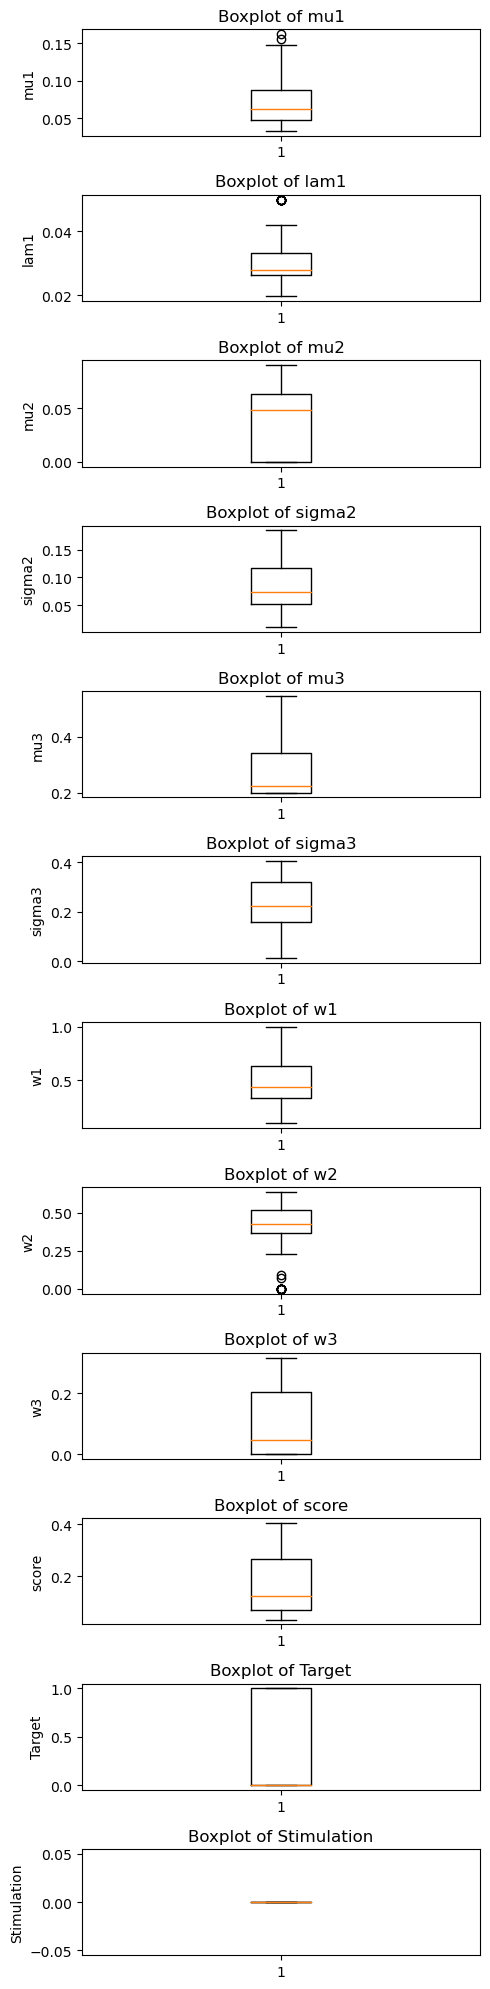

In [80]:
data=BL
columns_to_plot = ["mu1", "w1", "mu2", "w2", "score"]
columns_to_plot=data.columns
nr=int(len(columns_to_plot))
#fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 35))
fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 20))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(data[column])
    axes[i].set_title('Boxplot of {}'.format(column))
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

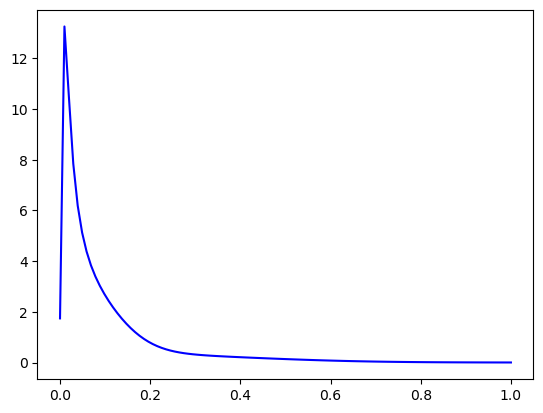

In [81]:
data=BL
mu1=np.mean(data['mu1'])
w1=np.mean(data['w1'])
lam1=np.mean(data['lam1'])
w2=np.mean(data['w2'])
mu2=np.mean(data['mu2'])
sigma2=np.mean(data['sigma2'])
w3=np.mean(data['w3'])
mu3=np.mean(data['mu3'])
sigma3=np.mean(data['sigma3'])
d= np.linspace(0.00, 1, len(data))
import scipy.stats as st
pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)
#bins = np.arange(0, .5, 1e-3) 

#plt.hist(ISI_data, bins, color='orange', alpha=0.7, label='Histogram',density=True)
plt.plot(d,pdf, color='blue', label='PDF')


# POST

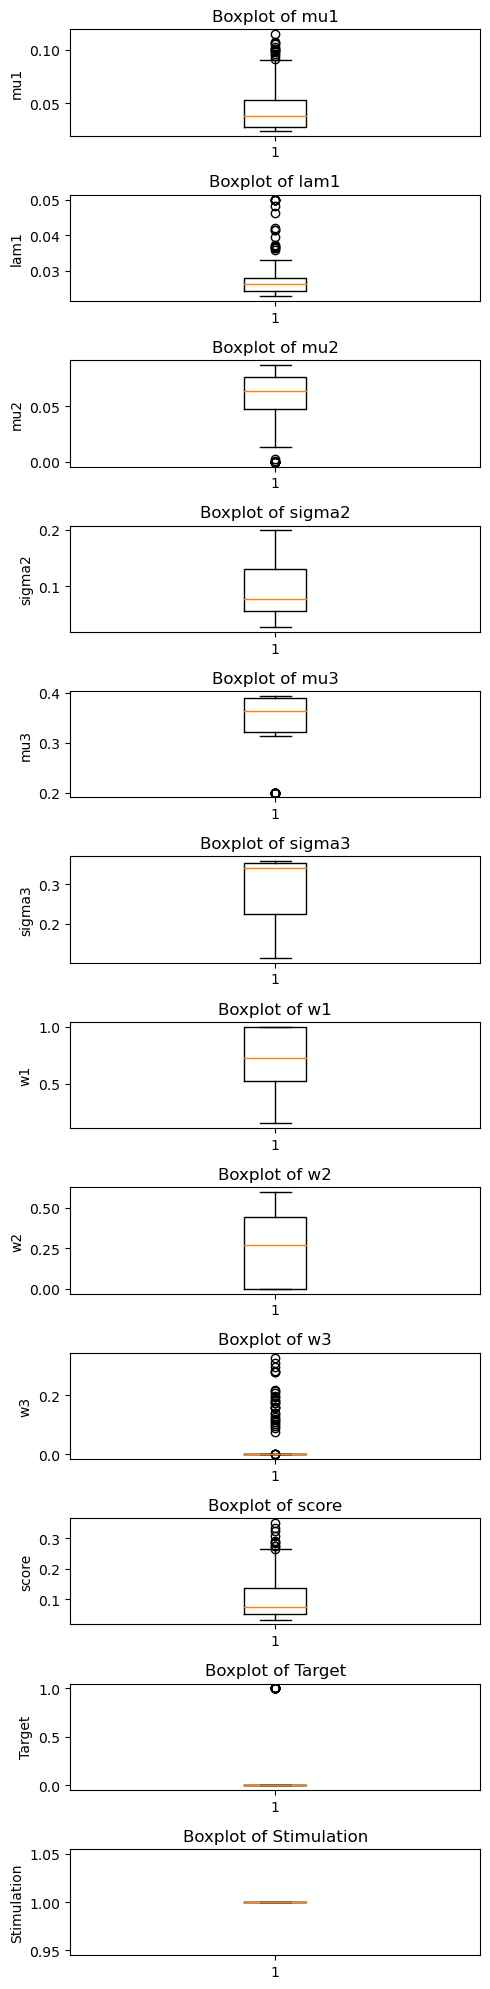

In [82]:
data=POST
columns_to_plot = ["mu1", "w1", "mu2", "w2", "score"]
columns_to_plot=data.columns
nr=int(len(columns_to_plot))
#fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 35))
fig, axes = plt.subplots(nrows=nr, ncols=1, figsize=(5, 20))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(data[column])
    axes[i].set_title('Boxplot of {}'.format(column))
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

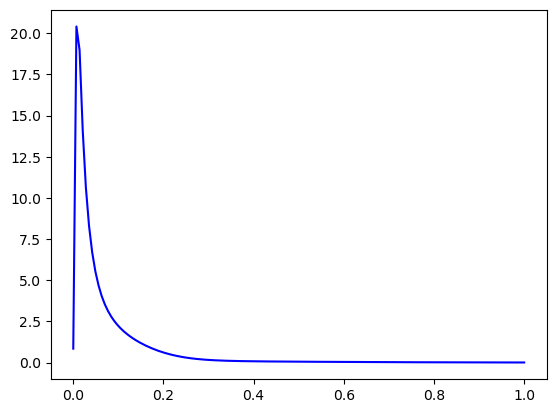

In [83]:
data=POST
mu1=np.mean(data['mu1'])
w1=np.mean(data['w1'])
lam1=np.mean(data['lam1'])
w2=np.mean(data['w2'])
mu2=np.mean(data['mu2'])
sigma2=np.mean(data['sigma2'])
w3=np.mean(data['w3'])
mu3=np.mean(data['mu3'])
sigma3=np.mean(data['sigma3'])
d= np.linspace(0.00, 1, len(data))
import scipy.stats as st
pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)
#bins = np.arange(0, .5, 1e-3) 

#plt.hist(ISI_data, bins, color='orange', alpha=0.7, label='Histogram',density=True)
plt.plot(d,pdf, color='blue', label='PDF')


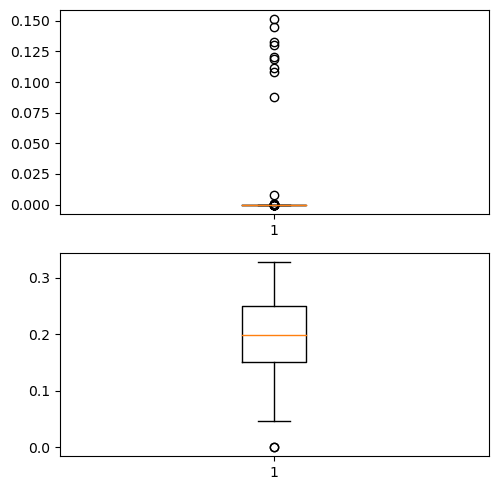

In [85]:
one =HEALTHY['w3']
two=LRRK2['w3']
# Plotting the boxplot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
axes[0].boxplot(one)
axes[1].boxplot(two)
plt.tight_layout()
plt.show()